<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/04_Convolutional_Neural_Network_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MultiClass Classification
We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).


🛠 Practice: Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.


  1. Become one with the data (visualize, visualize, visualize...)
  2. Preprocess the data (prepare it for a model)
  3. Create a model (start with a baseline)
  4. Fit the model
  5. Evaluate the model
  6. Adjust different parameters and improve model (try to beat your baseline)
  7. Repeat until satisfied

  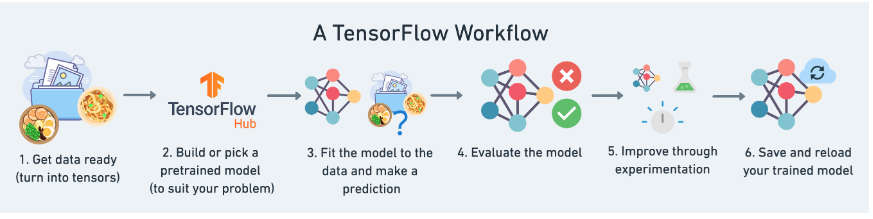


  The workflow we're about to go through is a slightly modified version of the above image. As you keep going through deep learning problems, you'll find the workflow above is more of an outline than a step-by-step guide.

  

#Step 1. Import and become one with the data

Again, we've got a subset of the Food101 dataset. In addition to the pizza and steak images, we've pulled out another eight classes

**We have been through a bunch of the following steps with a binary classificationn problem(pizza and steak), now we are going to step things up a notch with 10 classes of food (Multi Class Classification).**

  1. Become one with the data (visualize, visualize, visualize...)
  2. Preprocess the data (prepare it for a model)
  3. Create a model (start with a baseline)
  4. Fit the model
  5. Evaluate the model
  6. Adjust different parameters and improve model (try to beat your baseline)
  7. Repeat until satisfied


**The data is from the food 101 from kaaggle :** https://www.kaggle.com/datasets/dansbecker/food-101





In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-17 17:49:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.207, 74.125.203.207, 64.233.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  28.8MB/s    in 18s     

2023-12-17 17:49:57 (27.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

#Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in '10_food_classes_all_data' .
There are 10 directories and 0 images in '10_food_classes_all_data/test' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream' 

In [4]:
#Setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = '10_food_classes_all_data/test/'

In [5]:
#let's get the class names
import pathlib
import numpy as np

data_dir =pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
#Let's visualize our images

import matplotlib.pylab as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  #Setup the target directory (We'll view images from here)
  target_folder = target_dir+target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}") #Print the image shape

  return img

['2004848.jpg']
Image shape : (512, 512, 3)


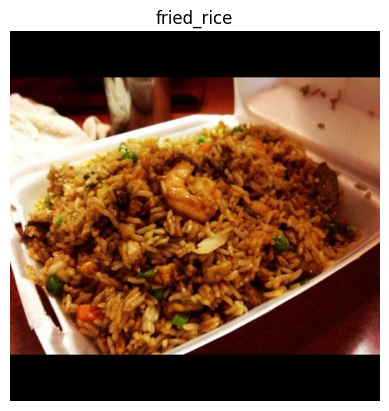

In [7]:
#View  a random Image from the training dataset
import random
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class=random.choice(class_names))


# Step 2. Preprocess the data

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#load the data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size = 32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Step 3 : Create a CNN model (Start with a baseline)

We've been working a lot about CNN explainer website...how about we just take their model (Also 10 layers and replicate it for our problem)



In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Step 4 : Fit a model



In [10]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)))

Epoch 1/5
235/235 [==============================] - 24s 83ms/step - loss: 2.1580 - accuracy: 0.1973 - val_loss: 2.0366 - val_accuracy: 0.2368
Epoch 2/5
235/235 [==============================] - 19s 80ms/step - loss: 1.9525 - accuracy: 0.3147 - val_loss: 1.8757 - val_accuracy: 0.3388
Epoch 3/5
235/235 [==============================] - 19s 80ms/step - loss: 1.6659 - accuracy: 0.4425 - val_loss: 1.9397 - val_accuracy: 0.3372
Epoch 4/5
235/235 [==============================] - 18s 77ms/step - loss: 1.1113 - accuracy: 0.6332 - val_loss: 2.2718 - val_accuracy: 0.2961
Epoch 5/5
235/235 [==============================] - 19s 83ms/step - loss: 0.5294 - accuracy: 0.8311 - val_loss: 2.9119 - val_accuracy: 0.2944


# Step 5 : Evaluate the model

In [11]:
#Evaluate the model

model_9.evaluate(test_data)


79/79 [==============================] - 6s 70ms/step - loss: 3.0972 - accuracy: 0.2692


[3.097153663635254, 0.26919999718666077]

In [12]:
#Check out the model's loss curves on the 10 classes
#Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  Returns separate loss cureves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()


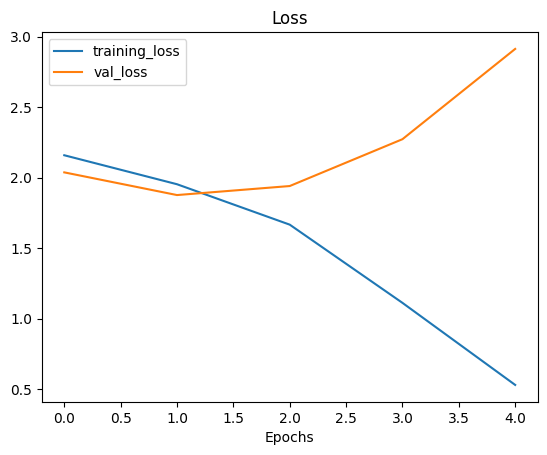

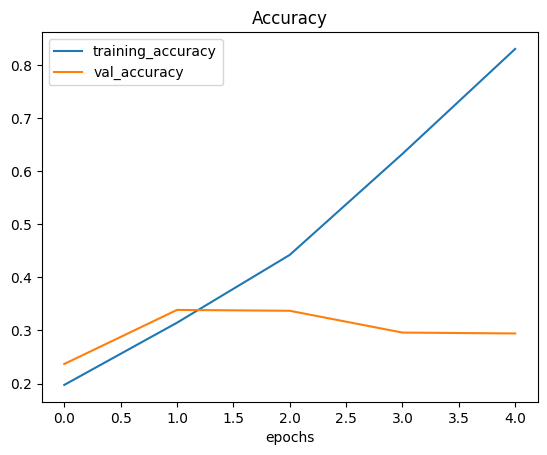

In [13]:
#Plot the loss curves to check

plot_loss_curves(history_9)

**Observation on loss curves :**
Well.. it seems our model is overfitting the training set quite badly..in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on test dataset.

# Step 6 : Adjust the model hyperparameters (to beat the baselie/overftting)

Due to it's performance on the training data. it's clear our model is learning something...

However, it's not generalizing well to unseen data

So let's try and fix the overfitting

**1. Get more data:** Having more data gives a model more oppurtunities to learn the patterns and result the best

**2. Simplify the model :**  If our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce #hidden units in a layers

**3. Use data augmentation:** Data augmentation manipulates the training data in a such way to add more direversity to it (without altering the original data)

**4. Use transfer learning :** Transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.





# Step 7 : Simplyfying the model to generalize the overfitting

In [14]:
#how about the simplify the model first and see
#let's try to remove 2 convelutional layers

model_10 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')

])

#Compile the model
model_10.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics =["accuracy"])

#Fit the model
history_10 = model_10.fit(train_data,
                          epochs =5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))


Epoch 1/5
235/235 [==============================] - 24s 96ms/step - loss: 2.2313 - accuracy: 0.2023 - val_loss: 2.0363 - val_accuracy: 0.2656
Epoch 2/5
235/235 [==============================] - 23s 96ms/step - loss: 1.8770 - accuracy: 0.3499 - val_loss: 2.0331 - val_accuracy: 0.2856
Epoch 3/5
235/235 [==============================] - 22s 93ms/step - loss: 1.5093 - accuracy: 0.4959 - val_loss: 2.1447 - val_accuracy: 0.2820
Epoch 4/5
235/235 [==============================] - 21s 91ms/step - loss: 0.9583 - accuracy: 0.6885 - val_loss: 2.5319 - val_accuracy: 0.2392
Epoch 5/5
235/235 [==============================] - 22s 96ms/step - loss: 0.5028 - accuracy: 0.8485 - val_loss: 2.9839 - val_accuracy: 0.2448


In [15]:

model_9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

model_10.summary()

 **Observation :** Looks like simplifying our model did not work as per expectation. The accuracy went down and the overfitting went on as usual so now let's try to check with the data augmentation.

#Step 8: Data Augmentation to reduce the overfitting in the model

Let's try and improve our model's results by using the augmented training data..

Ideally, we can want to :    
* Reduce overfitting (Get the train and validation loss curves closer)
* Improve validation accuracy

In [16]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


**Cloning the model if required :**

🔑 Note: One of the key practices in deep learning and machine learning in general is to be a serial experimenter. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

###Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

###Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

###Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [23]:
#Let's create another model but this time we'll fit it on the augmented training

# Create a model
model_11 = tf.keras.models.Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

#Compile a model
model_11.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#Fit a model
history_11 = model_11.fit(train_data_augmented,
             epochs = 5,
             steps_per_epoch = len(train_data_augmented),
             validation_data = test_data,
             validation_steps = len(test_data))


Epoch 1/5
235/235 [==============================] - 89s 374ms/step - loss: 2.2863 - accuracy: 0.1277 - val_loss: 2.1423 - val_accuracy: 0.2256
Epoch 2/5
235/235 [==============================] - 86s 367ms/step - loss: 2.1368 - accuracy: 0.2299 - val_loss: 2.0474 - val_accuracy: 0.2504
Epoch 3/5
235/235 [==============================] - 88s 373ms/step - loss: 2.0561 - accuracy: 0.2715 - val_loss: 1.9802 - val_accuracy: 0.3024
Epoch 4/5
235/235 [==============================] - 86s 368ms/step - loss: 1.9932 - accuracy: 0.3073 - val_loss: 1.8384 - val_accuracy: 0.3832
Epoch 5/5
235/235 [==============================] - 88s 373ms/step - loss: 1.9555 - accuracy: 0.3239 - val_loss: 1.8674 - val_accuracy: 0.3608


In [22]:
# Evaluate the model
model_11.evaluate(test_data)


79/79 [==============================] - 6s 70ms/step - loss: 1.7632 - accuracy: 0.3928


[1.7631639242172241, 0.3928000032901764]

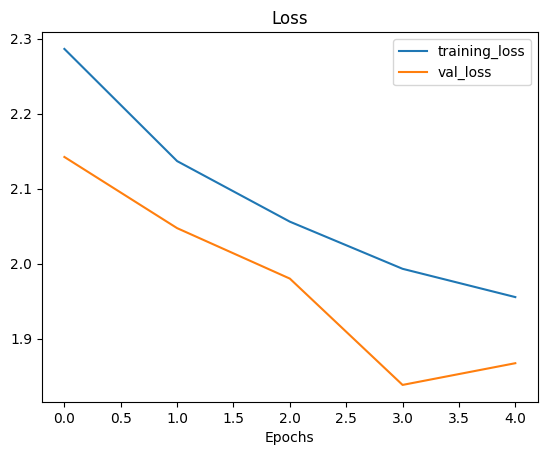

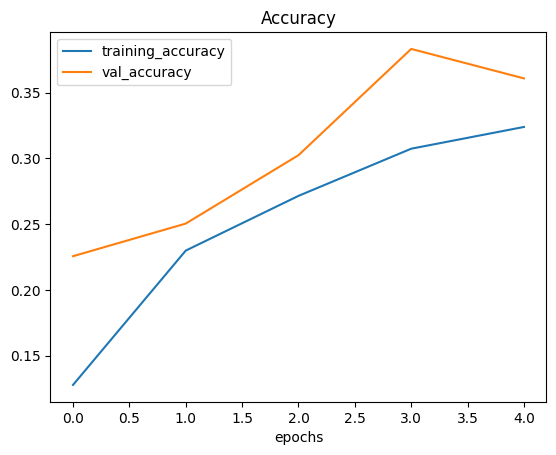

In [24]:
#plot the loss curves
plot_loss_curves(history_11)

**Note :** Woah! that looks much better, the loss curves are much closer to each other than the baseline model and they look like they are heading the right direction so if we were to train for longer, we might see further improvements.

# Step 9 : Repeat until satisfied


We could keep going here...continuously trying to get the loss curves together and trying to imrove the validation/test accuracy.

How ?
By running the lot's of experiments, namely:
- restructuring our model's architecture (increasing layers/ hidden units)
- Adjust the learning rate
- Try different methods of data augmentation (Adjust the hyperparameters in our ImageDataGenerators)
- Trying to train for longr to leran the patterns (maybe 10 epochs)
- More data
- Use **Transfer learning **




In [25]:
### Make a prediction with our trained model
class_names



array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [35]:
!wget https://www.indianhealthyrecipes.com/wp-content/uploads/2015/10/pizza-recipe-1.jpg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg



--2023-12-17 18:48:12--  https://www.indianhealthyrecipes.com/wp-content/uploads/2015/10/pizza-recipe-1.jpg
Resolving www.indianhealthyrecipes.com (www.indianhealthyrecipes.com)... 23.210.215.11, 23.210.215.32, 2600:1417:76::17d2:d70b, ...
Connecting to www.indianhealthyrecipes.com (www.indianhealthyrecipes.com)|23.210.215.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105674 (103K) [image/jpeg]
Saving to: ‘pizza-recipe-1.jpg.1’

pizza-recipe-1.jpg. 100%[===================>] 103.20K  --.-KB/s    in 0.04s   

2023-12-17 18:48:12 (2.36 MB/s) - ‘pizza-recipe-1.jpg.1’ saved [105674/105674]

--2023-12-17 18:48:12--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15848 (15K) [text/plain]
Saving to: ‘03-hamburger.jpeg.1’

03-hamburger.jpeg.1 100%[

In [32]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [33]:
#Lets try to plot our predictions and reconfig this to work with multiclass
# Adjust function to work with multi-class

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


In [40]:
#download any custom image using model_11
pred_and_plot(model_11, "/content/03-sushi.jpeg.1", class_names)

InvalidArgumentError: ignored

In [41]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

InvalidArgumentError: ignored

#Step 10 Save a model

Looks  like our model did not perform really well as expected on our custom images, it only achieved only 39% accuracy on training data.

Now let's save the model to deploy or to do somethng.



In [42]:
#save model
model_11.save("saved_trained_model_11")

In [46]:
#load in the trained model and evaluate it

loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
model_11.evaluate(test_data)


79/79 [==============================] - 6s 72ms/step - loss: 1.8674 - accuracy: 0.3608


[1.8673897981643677, 0.36079999804496765]